# Initialize global variables

In [3]:
import random
import os
import glob
from tqdm.notebook import tqdm_notebook # for a progress bar
from time import perf_counter_ns
import gc
# go to directory with test files
os.chdir('prim')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'prim'

In [4]:
def parse_input_file_prim(file_address):
    vertices = set()
    edges = [] 
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((int(x[2]), x[0], x[1])) #heapq ranks tuples based on the first value so we add it with respect to it!
    return vertices, edges, num_V_E

In [5]:
graphs_prim = []
adjacency_dict = {}
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_prim(file) #iterating through files and turning them into sets/lists
    for vertex in vertices: #creating adjacency list for each vertex
        adjacent_edges = [] 
        print(vertex)
        for (w,u,v) in edges:
            if (u == vertex or v == vertex):
                adjacent_edges.append((w,u,v))
        adjacency_dict[vertex] = adjacent_edges
    graphs_prim.append((num_V_E, vertices, edges, adjacency_dict))

  0%|          | 0/4 [00:00<?, ?it/s]

PermissionError: [Errno 13] Permission denied: '.git'

# Prim 

In [5]:
import heapq
def Prim(vertices, edges, adjacency_dict):
    heap = [] #this is our heap!
    S = set() #keep track of touched vertices
    tempV = next(iter(vertices)) #taking one of the vertices as our starting point
    heap = populate_heap(S, vertices, heap, tempV, adjacency_dict) #populating our heap with adjacent vertices
    S.add(tempV)
    MST = [] #our MST, a list of (w, u, v)
    not_S = populate_set(vertices,S) #untouched vertices
    while not_S: #loop until there's no untouched vertices
        light_edge = find_lightest_edge(S, heap)
        MST.append(light_edge) #populate our MST on each iteration
        heap = populate_heap(S, vertices, heap, light_edge[1], adjacency_dict) #only one would get added!
        heap = populate_heap(S, vertices, heap, light_edge[2], adjacency_dict) 
        S.add(light_edge[1]) #add only the Vertices
        S.add(light_edge[2]) 
        not_S = populate_set(vertices, S) #count untouched vertices
    return MST

def populate_set(vertices, Set1):
    return vertices.difference(Set1) #untouched vertices = all - touched
    
def find_lightest_edge(Set1, Heap):
    lightest = heapq.heappop(Heap) #pop the first element in heap which is the lightest edge available (might be a duplicate)!
    while ((lightest[2] in Set1) and (lightest[1] in Set1)): #if elements in heap were previously explored (duplicate), pop again!
        lightest = heapq.heappop(Heap)
    return lightest

def populate_heap(Set1, SetGlobal, Heap, newV, adjacency_dict):
    if newV in Set1: #don't add a vertex if it was already touched
        return Heap
    for (w, u, v) in adjacency_dict[newV]:
        if ((u in SetGlobal) and (v in SetGlobal)): #do not add unnecessary edges eg. those which connect a previously connected vertices to the MST
                heapq.heappush(Heap,(w, u, v)) #add the edges corresponding to the new vertex
    return Heap

def MSTweight(MST):
    sum = 0
    for (w ,u ,v) in MST: #calculate the weight of mst!
        sum = sum + w
    return sum

In [6]:
def get_time_prim(vertices, edges, adjacency_dict): #simply get the runtime for each instance
    gc.disable()
    start_time = perf_counter_ns()
    theMST = Prim(vertices, edges, adjacency_dict)
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    print("The Weight of MST is: ", MSTweight(theMST))
    return (end_time-start_time)

In [7]:
results = []
for i in tqdm_notebook(range(len(graphs_prim))):
    print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
    results.append((graphs_prim[i][0][0], get_time_prim(graphs_prim[i][1], graphs_prim[i][2],graphs_prim[i][3])))

  0%|          | 0/68 [00:00<?, ?it/s]

|V| =  10  |E| =  9
Running Time was:  4355300
The Weight of MST is:  11861
|V| =  10  |E| =  11
Running Time was:  128100
The Weight of MST is:  11861
|V| =  10  |E| =  13
Running Time was:  107400
The Weight of MST is:  11861
|V| =  10  |E| =  10
Running Time was:  99400
The Weight of MST is:  11861
|V| =  20  |E| =  24
Running Time was:  3421300
The Weight of MST is:  49300
|V| =  20  |E| =  24
Running Time was:  238200
The Weight of MST is:  49300
|V| =  20  |E| =  28
Running Time was:  282500
The Weight of MST is:  49300
|V| =  20  |E| =  26
Running Time was:  287100
The Weight of MST is:  49300
|V| =  40  |E| =  56
Running Time was:  7247600
The Weight of MST is:  65579
|V| =  40  |E| =  50
Running Time was:  654500
The Weight of MST is:  65579
|V| =  40  |E| =  50
Running Time was:  325800
The Weight of MST is:  65579
|V| =  40  |E| =  52
Running Time was:  494100
The Weight of MST is:  65579
|V| =  80  |E| =  108
Running Time was:  9702400
The Weight of MST is:  55363
|V| =  80

## Repeated runs for the first 50 graphs:

In [ ]:
repeated_results = []
for i in tqdm_notebook(range(0,50)):
    temp_results = []
    for j in range(0,1000):
        print("|V| = ", graphs_prim[i][0][0], " |E| = ", graphs_prim[i][0][1])
        temp_results.append(get_time_prim(graphs_prim[i][1], graphs_prim[i][2],graphs_prim[i][3]))
    repeated_results.append((graphs_prim[i][0][0], sum(temp_results)/len(temp_results)))
repeated_results

[(10, 71069.0),
 (10, 71375.2),
 (10, 67832.5),
 (10, 64246.7),
 (20, 135570.1),
 (20, 130998.6),
 (20, 134058.4),
 (20, 145682.5),
 (40, 358995.9),
 (40, 289853.3),
 (40, 303308.9),
 (40, 308634.2),
 (80, 880327.9),
 (80, 755946.3),
 (80, 787073.2),
 (80, 898842.2),
 (100, 1017502.6),
 (100, 1068068.8),
 (100, 1507290.3),
 (100, 1563611.6),
 (200, 3363439.1),
 (200, 2890630.4),
 (200, 2938192.4),
 (200, 3273961.1),
 (400, 11249540.6),
 (400, 13162709.1),
 (400, 12245901.7),
 (400, 11342770.5),
 (800, 48768349.9),
 (800, 44717674.6),
 (800, 39874623.0),
 (800, 38530785.2),
 (1000, 56514951.9),
 (1000, 56700692.8),
 (1000, 57111127.9),
 (1000, 59169263.2),
 (2000, 316595100.6),
 (2000, 321332957.4),
 (2000, 325701429.3),
 (2000, 314826829.1),
 (4000, 1121763378.1),
 (4000, 1239835894.9),
 (4000, 1357914440.8),
 (4000, 1464875453.5),
 (8000, 6337423683.6),
 (8000, 6904424771.5),
 (8000, 5654995495.6),
 (8000, 6313924172.4),
 (10000, 8839126519.4),
 (10000, 9047188623.1)]

### Plotting the results:

[(10, 4355300), (10, 128100), (10, 107400), (10, 99400), (20, 3421300), (20, 238200), (20, 282500), (20, 287100), (40, 7247600), (40, 654500), (40, 325800), (40, 494100), (80, 9702400), (80, 1700400), (80, 1733100), (80, 1696300), (100, 5735700), (100, 2028500), (100, 2030500), (100, 1152300), (200, 13903200), (200, 5166600), (200, 4637500), (200, 3602800), (400, 31708700), (400, 15091700), (400, 17149700), (400, 15300800), (800, 56447400), (800, 46558800), (800, 35771100), (800, 35466200), (1000, 66592100), (1000, 53684800), (1000, 53848500), (1000, 62211300), (2000, 326068800), (2000, 406340500), (2000, 364582400), (2000, 319829000), (4000, 1202567900), (4000, 1305049400), (4000, 1190213300), (4000, 1407215900), (8000, 6204968500), (8000, 5794934800), (8000, 5814232600), (8000, 6311198700), (10000, 11173796700), (10000, 9897901000), (10000, 10710801000), (10000, 9994435300), (20000, 60371450600), (20000, 55051547700), (20000, 54955554100), (20000, 57129661100), (40000, 226272122200),

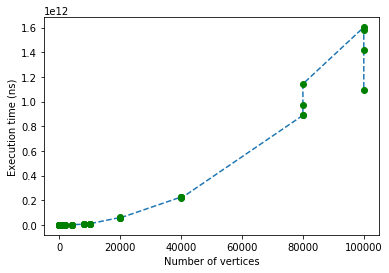

In [8]:
import matplotlib.pyplot as plt
results = sorted(results,key=lambda results: results[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]

# build the plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

### Plotting the repeated results:

[(10, 71069.0), (10, 71375.2), (10, 67832.5), (10, 64246.7), (20, 135570.1), (20, 130998.6), (20, 134058.4), (20, 145682.5), (40, 358995.9), (40, 289853.3), (40, 303308.9), (40, 308634.2), (80, 880327.9), (80, 755946.3), (80, 787073.2), (80, 898842.2), (100, 1017502.6), (100, 1068068.8), (100, 1507290.3), (100, 1563611.6), (200, 3363439.1), (200, 2890630.4), (200, 2938192.4), (200, 3273961.1), (400, 11249540.6), (400, 13162709.1), (400, 12245901.7), (400, 11342770.5), (800, 48768349.9), (800, 44717674.6), (800, 39874623.0), (800, 38530785.2), (1000, 56514951.9), (1000, 56700692.8), (1000, 57111127.9), (1000, 59169263.2), (2000, 316595100.6), (2000, 321332957.4), (2000, 325701429.3), (2000, 314826829.1), (4000, 1121763378.1), (4000, 1239835894.9), (4000, 1357914440.8), (4000, 1464875453.5), (8000, 6337423683.6), (8000, 6904424771.5), (8000, 5654995495.6), (8000, 6313924172.4), (10000, 8839126519.4), (10000, 9047188623.1)]


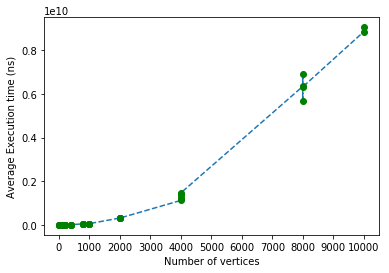

In [ ]:
import matplotlib.pyplot as plt 
repeated_results = sorted(repeated_results,key=lambda repeated_results: repeated_results[0]) #plot the result here
print(repeated_results)
x_val = [x[0] for x in repeated_results]
y_val = [x[1] for x in repeated_results]
plt.locator_params('x',nbins = 20)
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Average Execution time (ns)")
plt.xlabel("Number of vertices")
plt.show()

# Parse input

In [1]:
def parse_input_file_kruskal(file_address):
    # store vertices and edges in separate sets
    vertices = set()
    edges = [] 
    # read file
    with open(glob.glob(file_address)[0]) as f:
        lines = f.readlines()
    num_V_E = [int(x) for x in lines[0].split()]
    lines = lines[1:]
    # populate sets
    for line in lines:
        x = line.split()
        vertices.add(x[0])
        vertices.add(x[1])
        edges.append((x[0], x[1], int(x[2])))
    vertices = list(vertices)
    return vertices, edges, num_V_E

In [2]:
graphs_kruskal = []
for file in tqdm_notebook(os.listdir()):
    vertices, edges, num_V_E = parse_input_file_kruskal(file) 
    graphs_kruskal.append((num_V_E, vertices, edges))

NameError: name 'tqdm_notebook' is not defined

In [6]:
# Graph object
class Graph:
    def __init__(self, V, E, num_V, num_E):
        self.V = V
        self.E = E
        self.num_V = num_V
        self.num_E = num_E

# Kruskal Efficient

In [9]:
class Kruskal_Efficient:
    
    def __init__(self, graph):
        self.graph = graph
        self.sets = {} # set of vertices
        self.MST = [] # Minimum Spanning Tree
    
    
    # make a set of vertices
    def make_sets(self):
        for v in self.graph.V:
            self.sets[v] = [v]
        
    
    # union the subsets which the vertices are not in the same sets
    def union(self, u_prnt, v_prnt):
        # get the size of two elements and append the vertices to the bigger one
        if (len(self.sets.get(u_prnt)) >= len(self.sets.get(v_prnt))):
            self.sets[u_prnt].extend(self.sets[v_prnt])
            self.sets.pop(v_prnt)
        # append the list of vertices of parent u to v
        else:
            self.sets[v_prnt].extend(self.sets[u_prnt])
            self.sets.pop(u_prnt)
    
    
    
    # find the parent of u and v vertices and return the parents
    def find_parent(self, u, v, items):
        u_key = v_key = 0
        for item in list(items):
            # item[0] is the key in dictionary
            # item[1] is the values in the dictionary
            key, value = item[0], item[1]
            # check the vertices in the value list and return the key as the parent of the vertex
            if u in value:
                u_key = item[0]
            if v in value:
                v_key = item[0]
            if u_key and v_key:
                break
        return (u_key, v_key)
    
    
    
    # make the MST tree
    def execute(self):      
        # sorting the edges based on the wight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])
        self.make_sets() # make a set of vertices
        # make a list of sets of key and value pairs to iterate through them
        items = self.sets.items()
        for e in E:
            # check if number of edges in MST are less than  nodes are 
            if((len(self.MST)+1) <  int(self.graph.num_E)):
                u, v, w = e
                u_parent, v_parent = self.find_parent(u, v, items)
                # if the vertices(u,v) are not in the same sets
                if (u_parent != v_parent):
                    self.union(u_parent, v_parent)
                    # add the edge to the MST[]
                    self.MST.append(e)
            # if the MST is completed, stop looping through the edges
            else:
                break

        return self.MST

    
    # calculate the final weight of the MST
    def MSTweight_EK(self):
        sum = 0
        for (u ,v, w) in self.MST:
            sum = sum + w
        return sum

In [10]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Efficient(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    result = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    print("Running Time was: ", end_time-start_time)
    return (end_time-start_time)

In [11]:
results_k_efficient = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal))):
    print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_efficient.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

0it [00:00, ?it/s]

## Repeated runs for the first 50 graphs:

In [1]:
repeated_results = []
for i in tqdm_notebook(range(0,50)):
    temp_results = []
    for j in range(0,1000):
        print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
        temp_results.append(get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2],graphs_kruskal[i][3]))
    repeated_results.append((graphs_kruskal[i][0][0], sum(temp_results)/len(temp_results)))
repeated_results

NameError: name 'tqdm_notebook' is not defined

### Plotting the results:

[(10, 30100), (10, 37800), (10, 38200), (10, 77200), (20, 86600), (20, 115900), (20, 92600), (20, 94000), (40, 314300), (40, 307300), (40, 242900), (40, 352300), (80, 795000), (80, 828000), (80, 1121600), (80, 783600), (100, 1367100), (100, 1389600), (100, 1160900), (100, 1073700), (200, 4117500), (200, 4033000), (200, 4155600), (200, 4197900), (400, 16837600), (400, 16215100), (400, 15222400), (400, 15251300), (800, 62482600), (800, 64100100), (800, 61568300), (800, 63601000), (1000, 95166600), (1000, 97393600), (1000, 98970100), (1000, 96134100), (2000, 405935200), (2000, 406663000), (2000, 406176000), (2000, 418425400), (4000, 1644818700), (4000, 1645803200), (4000, 1651764700), (4000, 1663303200), (8000, 6653808500), (8000, 6638481500), (8000, 6804117300), (8000, 6644977200), (10000, 10374184800), (10000, 10260758700), (10000, 10362527700), (10000, 10361383400), (20000, 44795341600), (20000, 45190369400), (20000, 45116802000), (20000, 45606853700), (40000, 266453271100), (40000, 29

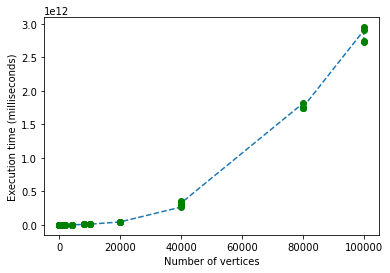

In [22]:
import matplotlib.pyplot as plt
results_k_efficient = sorted(results_k_efficient, key=lambda results: results[0])
x_val = [x[0] for x in results_k_efficient]
y_val = [x[1] for x in results_k_efficient]

# build the plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

### Plotting the repeated results:

[]


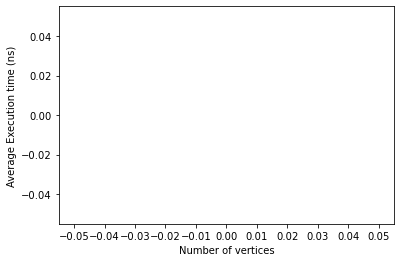

In [2]:
import matplotlib.pyplot as plt 
repeated_results = sorted(repeated_results,key=lambda repeated_results: repeated_results[0]) #plot the result here
print(repeated_results)
x_val = [x[0] for x in repeated_results]
y_val = [x[1] for x in repeated_results]
plt.locator_params('x',nbins = 20)
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Average Execution time (ns)")
plt.xlabel("Number of vertices")
plt.show()

# Kruskal Naive

In [7]:
class Kruskal_Naive:
    def __init__(self, graph):
        self.graph = graph
        self.MST = {} # adjacency list
        self.MST_edges = [] # edges
        
    def dfs_cycle(self, visited, G, v, parent):   
        # using DFS traversal find a cycle
        visited.add(v)
        for neighbour in G[v]:
            if neighbour != parent and neighbour in visited:
                return True
            elif neighbour != parent:            
                return self.dfs_cycle(visited, G, neighbour, v)
        return False
    
    def check_cycle(self, edge):
        u, v, w = edge
        if (u in self.MST and v in self.MST[u]) or (v in self.MST and u in self.MST[v]):
            return True
        visited = set()
        # create a graph to check the edge addition
        MST_with_e = {}
        # add target edge
        MST_with_e[u] = [v]
        MST_with_e[v] = [u]
        # populate with MST edges
        for i in range(len(self.MST_edges)):
            a, b, w = self.MST_edges[i]
            if a not in MST_with_e:
                MST_with_e[a] = []
            if b not in MST_with_e:
                MST_with_e[b] = []
            MST_with_e[a].append(b)
            MST_with_e[b].append(a)
        
        return self.dfs_cycle(visited, MST_with_e, u, '-1')
    
    def execute(self):
        # sorting based on the weight of the edges    
        E = sorted(self.graph.E, key = lambda m: m[2])   
        # for each edge, check if it doesn't violate the invariant
        for e in E:
            if not self.check_cycle(e):
                self.MST_edges.append(e)
                if e[0] not in self.MST:
                    self.MST[e[0]] = []
                self.MST[e[0]].append(e[1])
        return self.MST_edges

In [8]:
def get_time_kruskal(vertices, edges, num_V_E):
    graph = Graph(vertices, edges, num_V_E[0], num_V_E[1]) # initialize graph
    algo = Kruskal_Naive(graph) # initialize algorithm object
    gc.disable() # disable garbage collector
    start_time = perf_counter_ns()
    full_edges  = algo.execute()
    end_time = perf_counter_ns()
    gc.enable()
    #print("Running Time was: ", end_time-start_time)
    #print(full_edges)
    #print("Total weight: {}".format(sum([e[2] for e in full_edges])))
    return (end_time-start_time)

In [ ]:
results_k_naive = []
# with a progress bar, execute the algorithm
for i in tqdm_notebook(range(len(graphs_kruskal[:10]))):
    #print("|V| = ", graphs_kruskal[i][0][0], " |E| = ", graphs_kruskal[i][0][1])
    results_k_naive.append((graphs_kruskal[i][0][0], get_time_kruskal(graphs_kruskal[i][1], graphs_kruskal[i][2], graphs_kruskal[i][0])))

  0%|          | 0/68 [00:00<?, ?it/s]

[(10, 39600), (10, 58100), (10, 54300), (10, 52200), (20, 156300), (20, 246100), (20, 262400), (20, 121900), (40, 736800), (40, 599800), (40, 617200), (40, 779500), (80, 1991600), (80, 2168800), (80, 2121700), (80, 2227900), (100, 3273700), (100, 3532100), (100, 3308600), (100, 2970400), (200, 13669900), (200, 14320900), (200, 12150400), (200, 12823800), (400, 54698400), (400, 53536400), (400, 52089100), (400, 54135600), (800, 212056700), (800, 209625000), (800, 200457600), (800, 206821200), (1000, 330721800), (1000, 335730900), (1000, 320822300), (1000, 339559900), (2000, 1381036200), (2000, 1363782100), (2000, 1370117900), (2000, 1394933200), (4000, 5512970500), (4000, 5663087000), (4000, 5678547200), (4000, 5668277400), (8000, 22492685100), (8000, 22320784500), (8000, 22107688300), (8000, 22111098900), (10000, 34454909000), (10000, 35131162400), (10000, 34936482400), (10000, 34909513500), (20000, 157748629400), (20000, 152819958100), (20000, 154456007100), (20000, 150680240600), (40

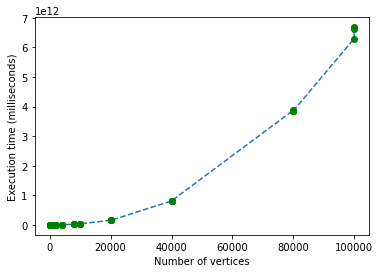

In [12]:
import matplotlib.pyplot as plt
results_k_naive = sorted(results_k_naive, key=lambda results: results[0])
print(results_k_naive)
x_val = [x[0] for x in results_k_naive]
y_val = [x[1] for x in results_k_naive]

# build a plot
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [13]:
plt.show()